# Test Benchmarking

Parameters:
* Compiler: `g++ 4.9.4`
* Compiler flags: `-O3 -std=c++11 -march=native`
* CPU: `Core i7-6820HQ Skylake, 2.7GHz`

This file is to test some benchmarking of the $\mathcal{O}(n^2)$ implementation of the t-SNE algorithm.

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline

from visualization import *
from util_tsne_exact import read_benchmark_exact
from util_tsne_exact import FUNCTION_NAMES as FUNCTION_NAMES_EX
from util_tsne_bh import read_benchmark_bh
from util_tsne_bh import FUNCTION_NAMES as FUNCTION_NAMES_BH

Read the data.

In [2]:
N, total_flops_ex, flops_by_function_ex, cycles_ex = read_benchmark_exact("../implementations/tsne_exact/benchmarking/20170502_100055@-O3 -march=native@")

Plot the performance plot.

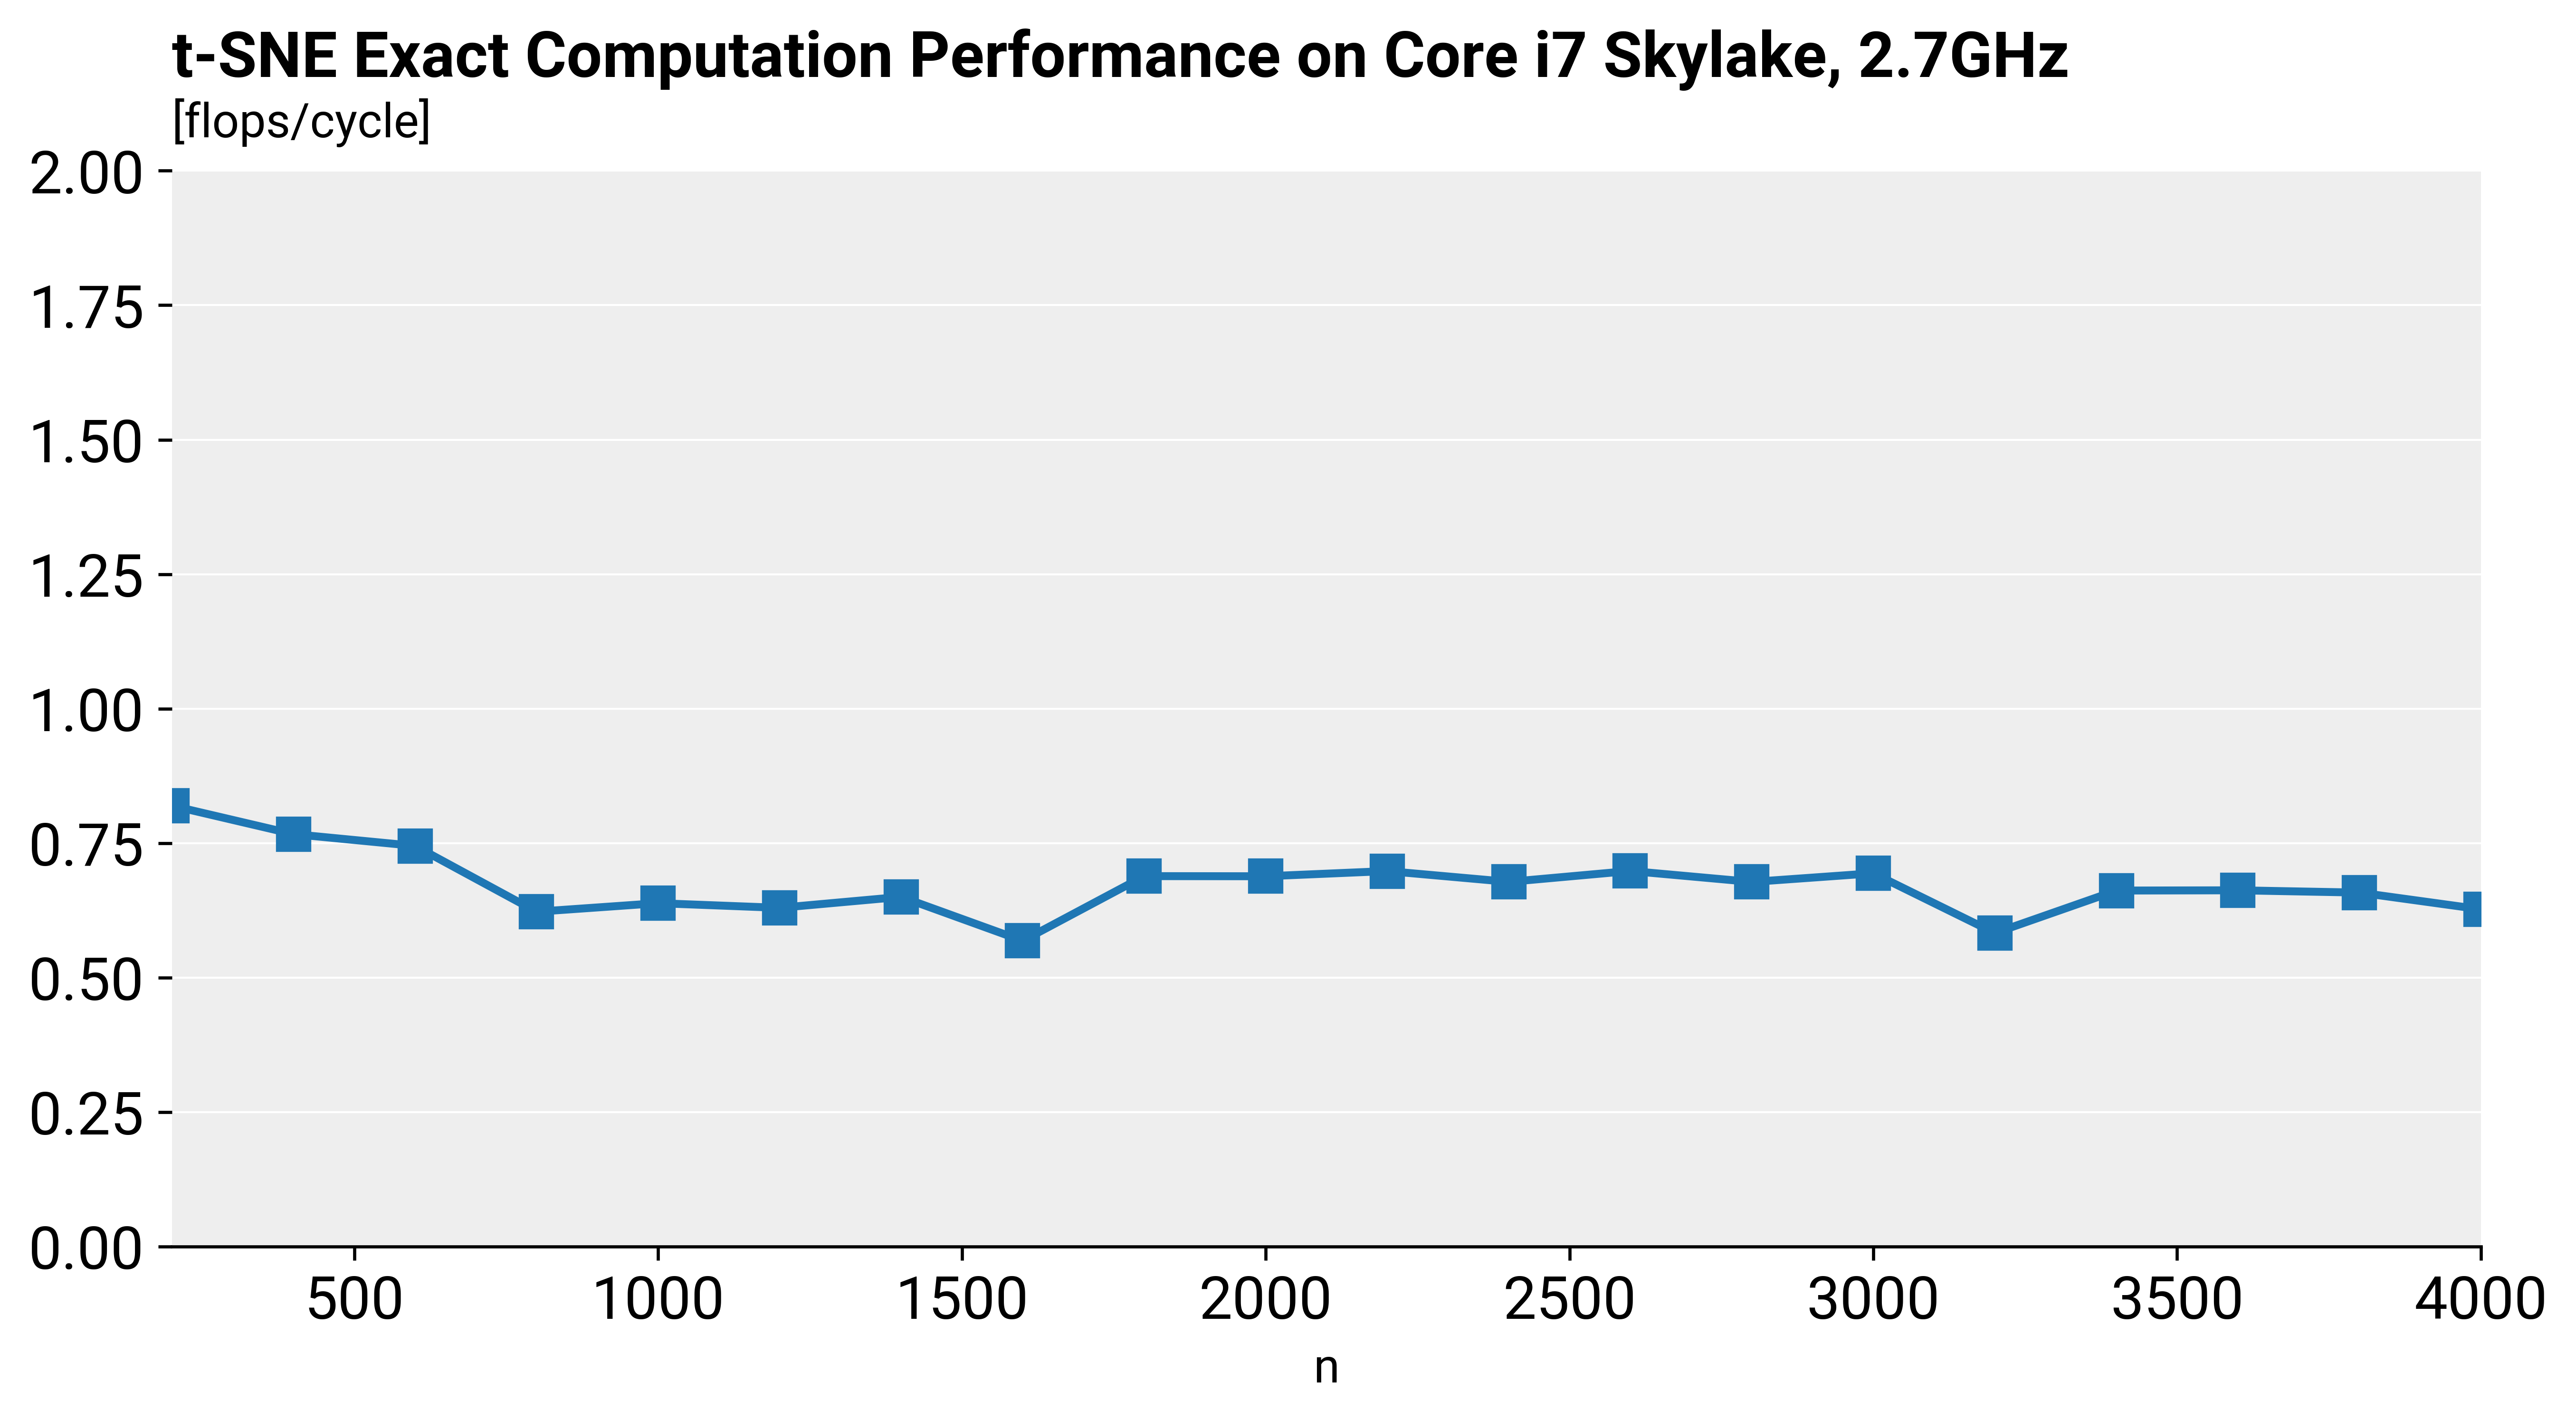

In [3]:
performance_total_ex = total_flops_ex / cycles_ex[:,-1]

title = "t-SNE Exact Computation Performance on Core i7 Skylake, 2.7GHz"
plot(N, performance_total_ex, title=title)
plt.show()

Now separate the performance by each algorithm function.

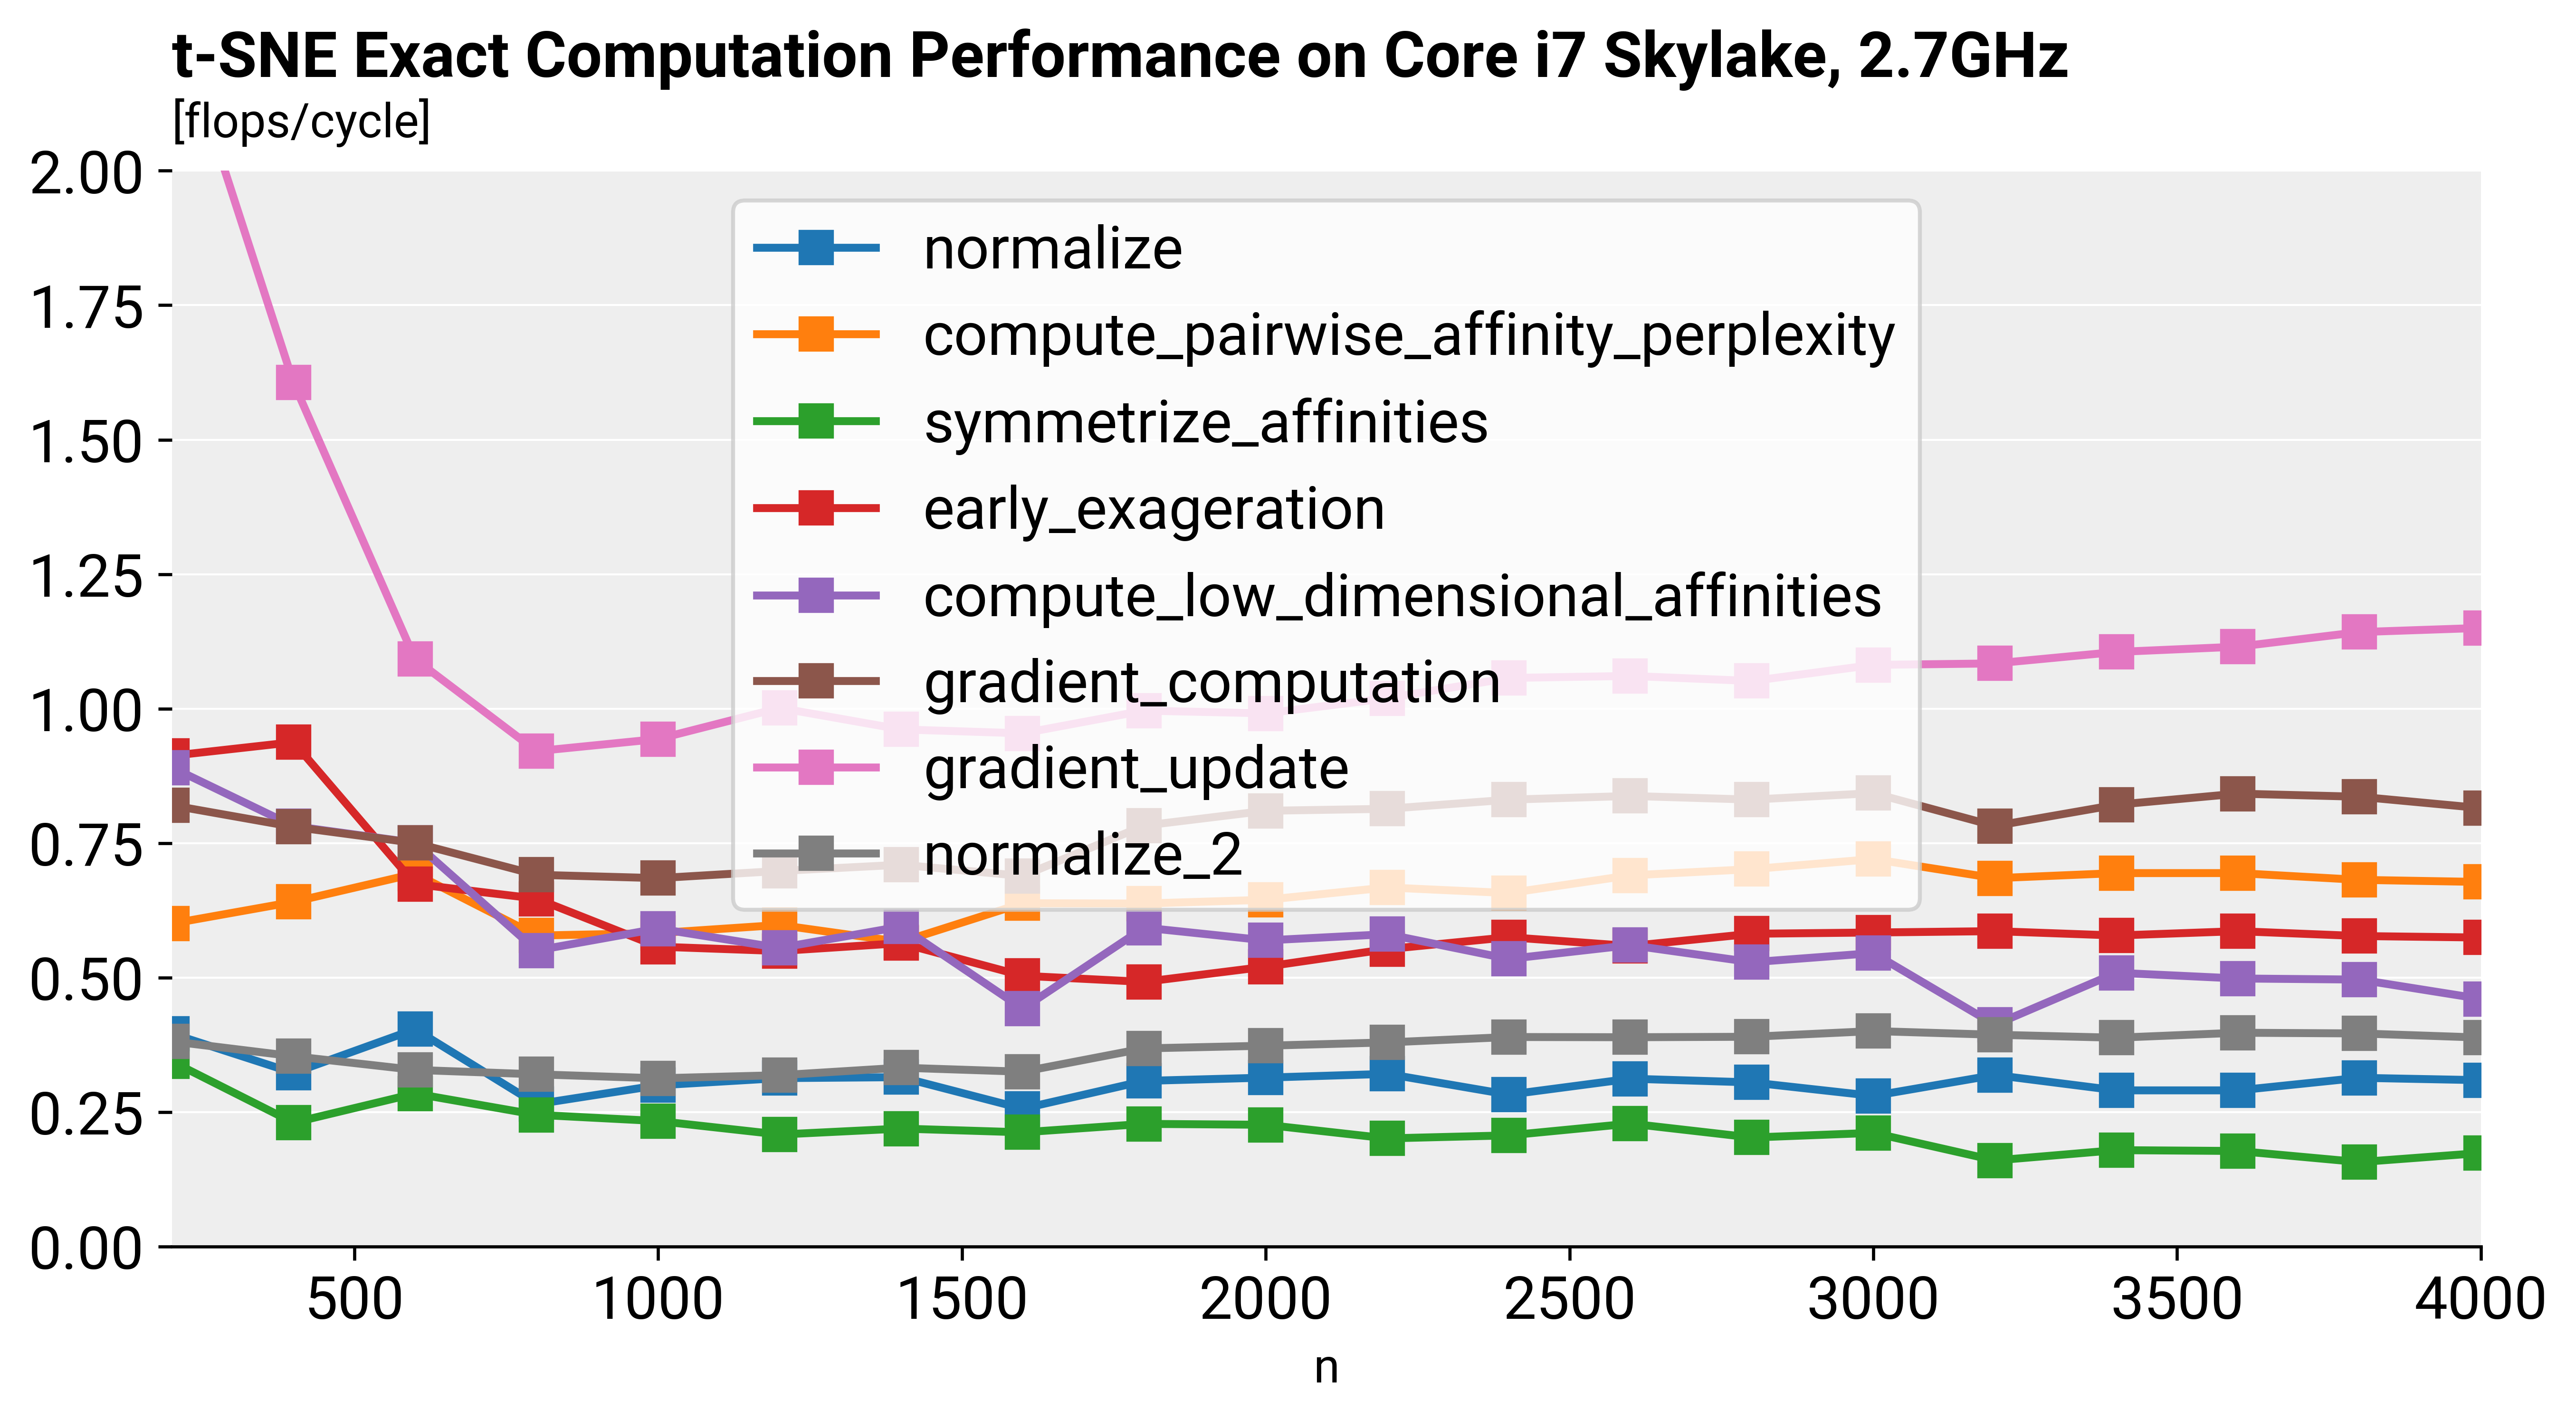

In [4]:
performance_by_function_ex = flops_by_function_ex / cycles_ex[:,:-1]

title = "t-SNE Exact Computation Performance on Core i7 Skylake, 2.7GHz"
plot(N, performance_by_function_ex.T, labels=FUNCTION_NAMES_EX, title=title)
plt.show()

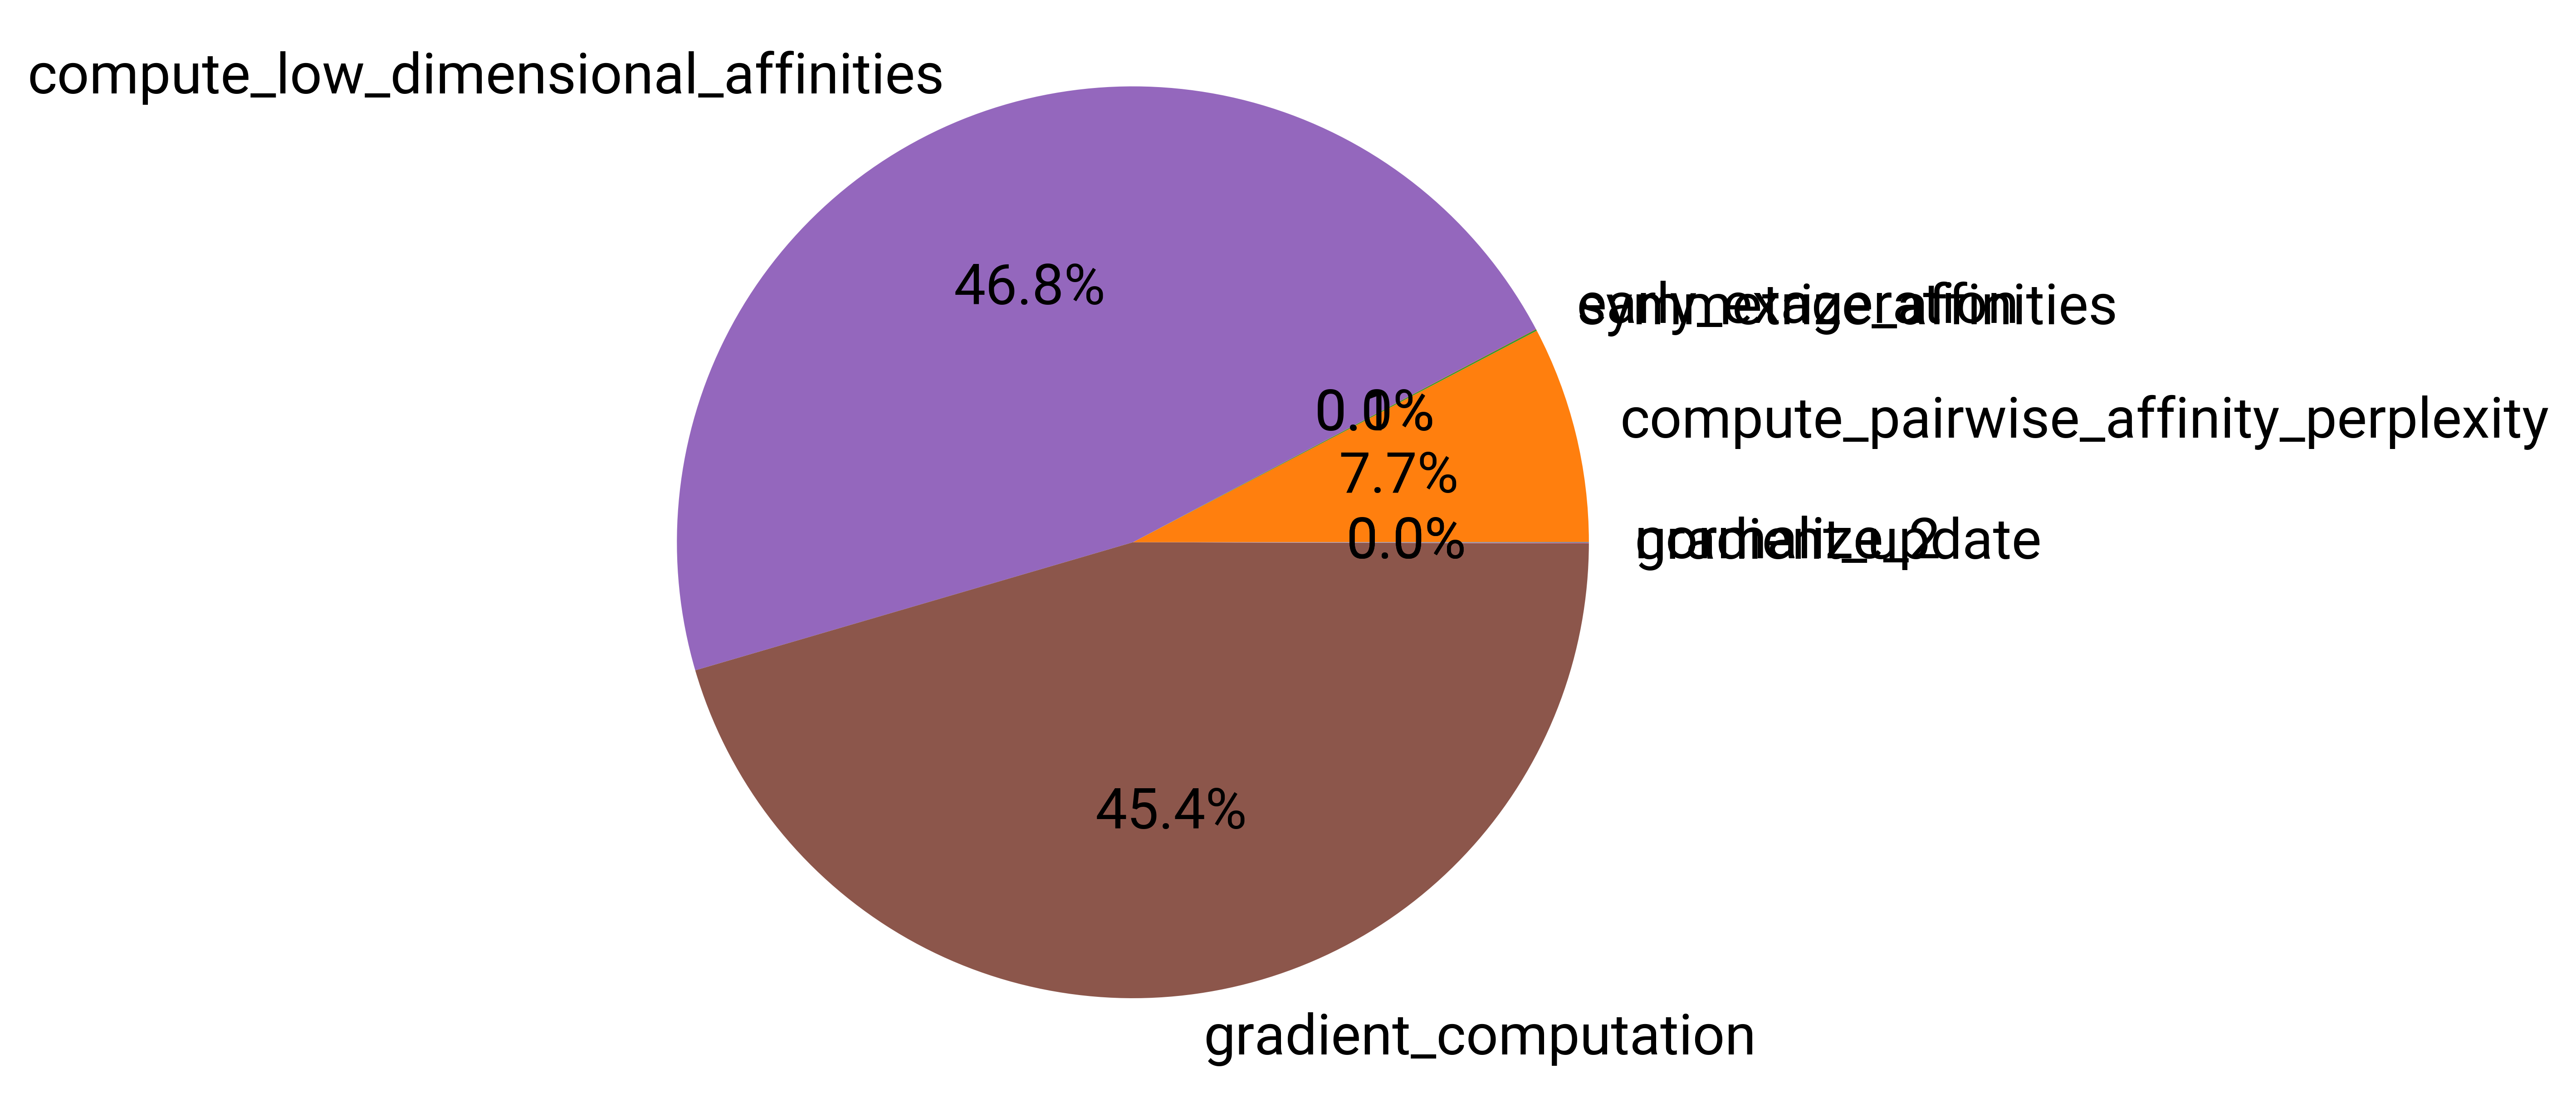

In [33]:
plt.pie(cycles_ex[-1,:-1], labels = FUNCTION_NAMES_EX, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

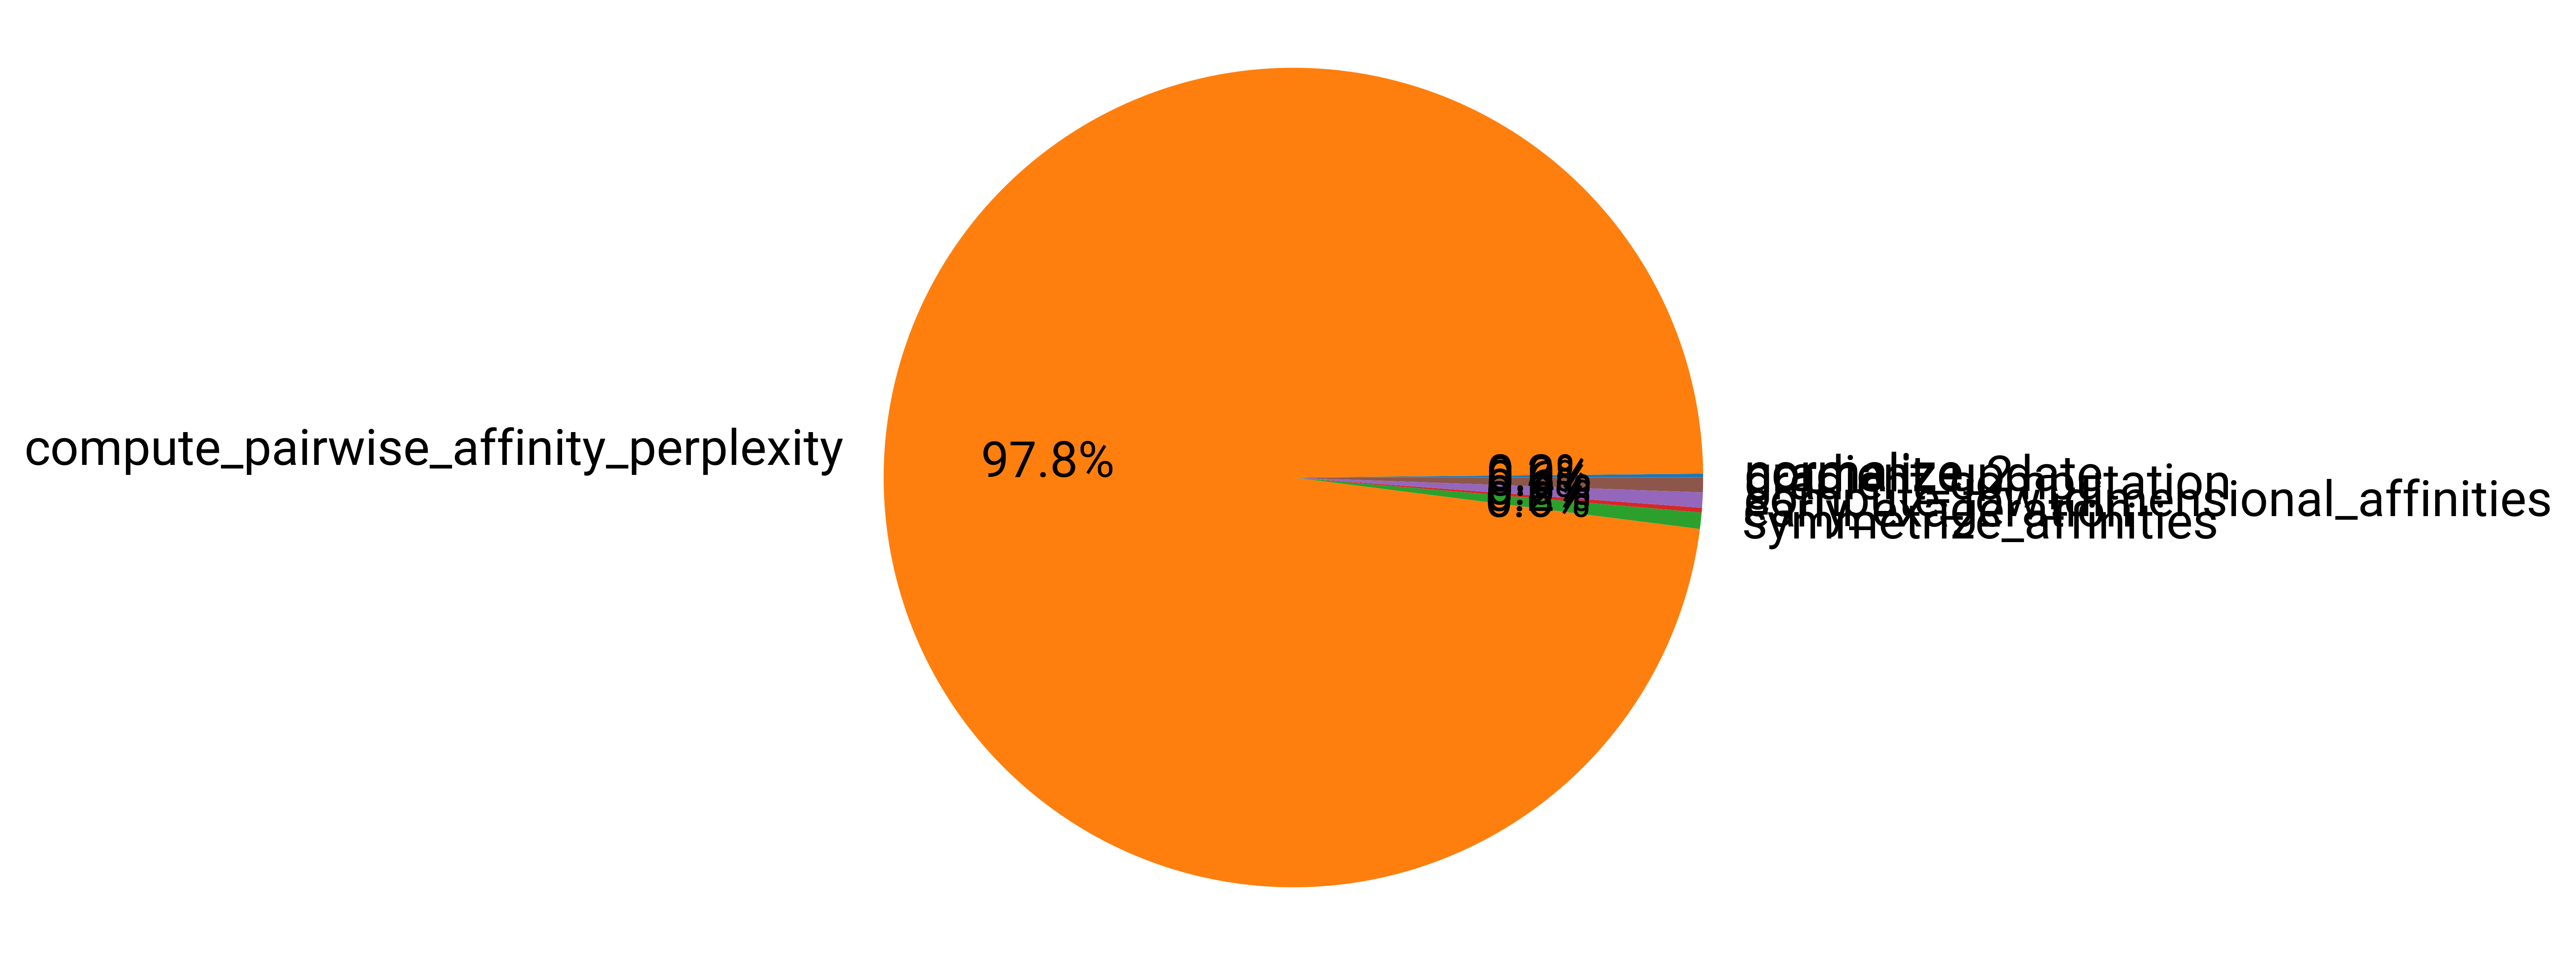

In [34]:
cycles_by_call_ex = cycles_ex[:,:-1].copy()
cycles_by_call_ex[:,4:] /= 1000

plt.pie(cycles_by_call_ex[-1], labels = FUNCTION_NAMES_EX, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## $\mathcal{O}(n \log n)$

In [22]:
N, total_flops_bh, flops_by_function_bh, cycles_bh = read_benchmark_bh(
    "../implementations/tsne_nlogn/benchmarking/20170509_105602@-O3 -std=c++11 -march=native@@", stop=3000)

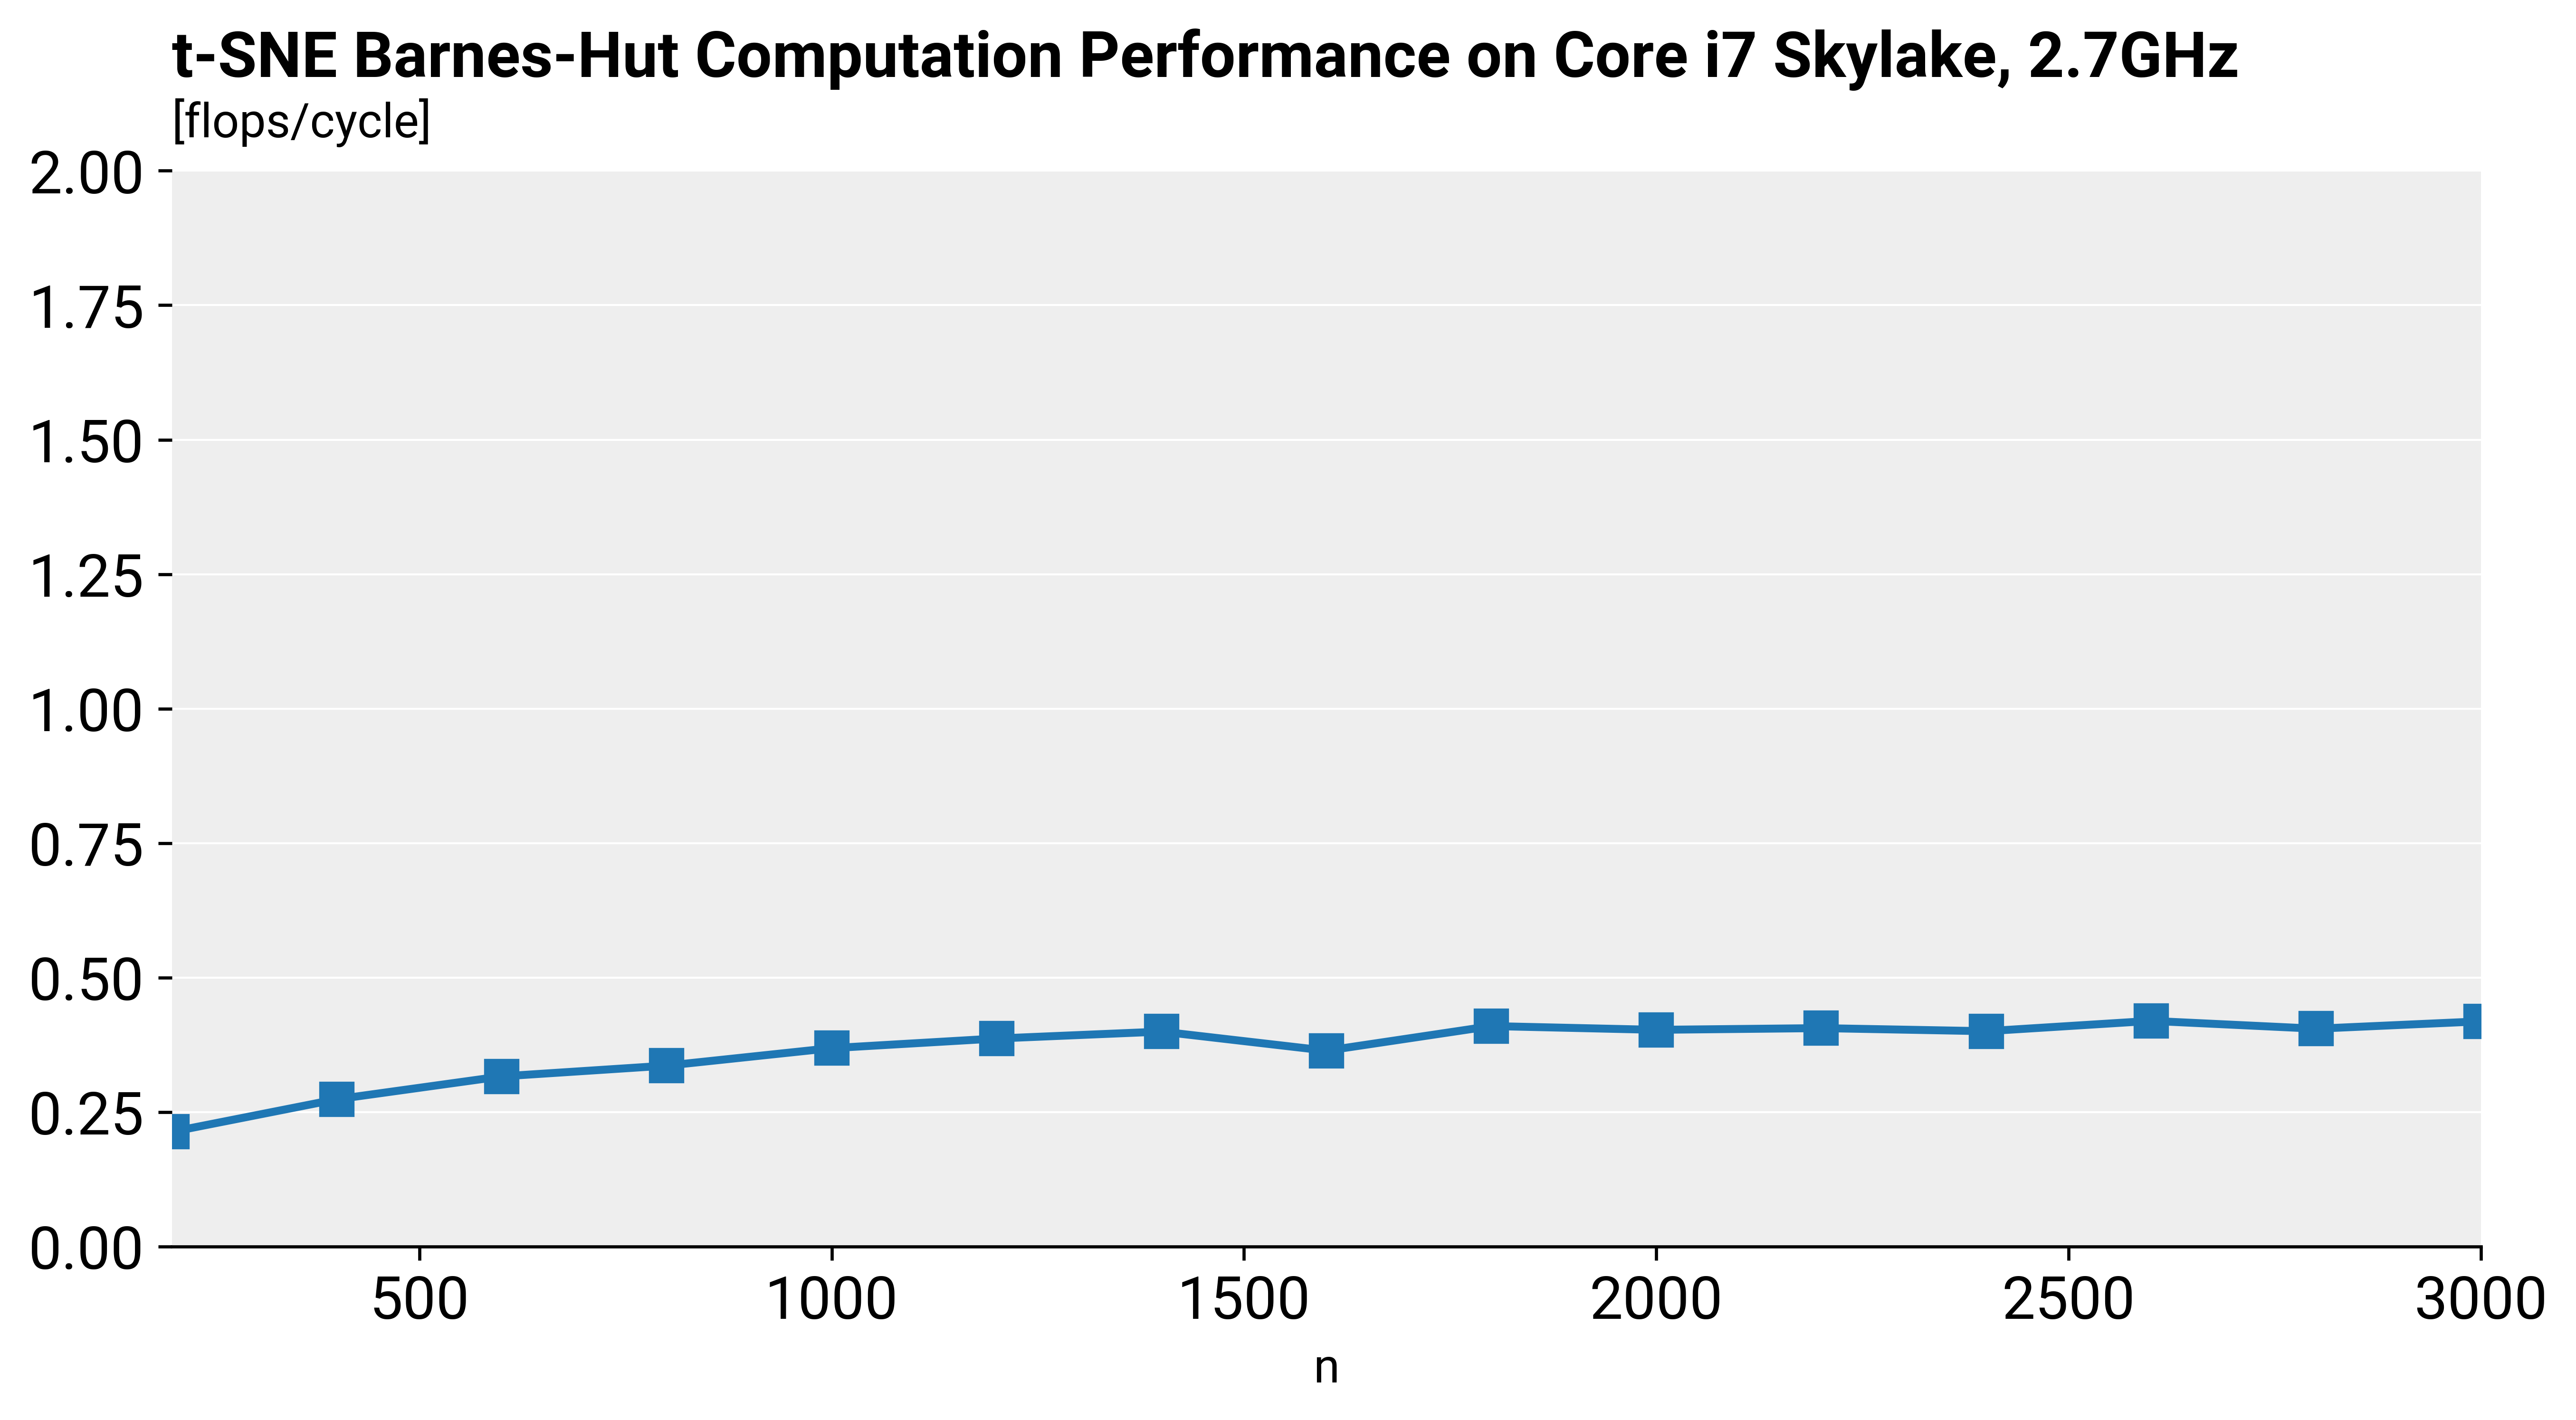

In [6]:
performance_total_bh = total_flops_bh / cycles_bh[:,-1]

title = "t-SNE Barnes-Hut Computation Performance on Core i7 Skylake, 2.7GHz"
plot(N, performance_total_bh, title=title)
plt.show()

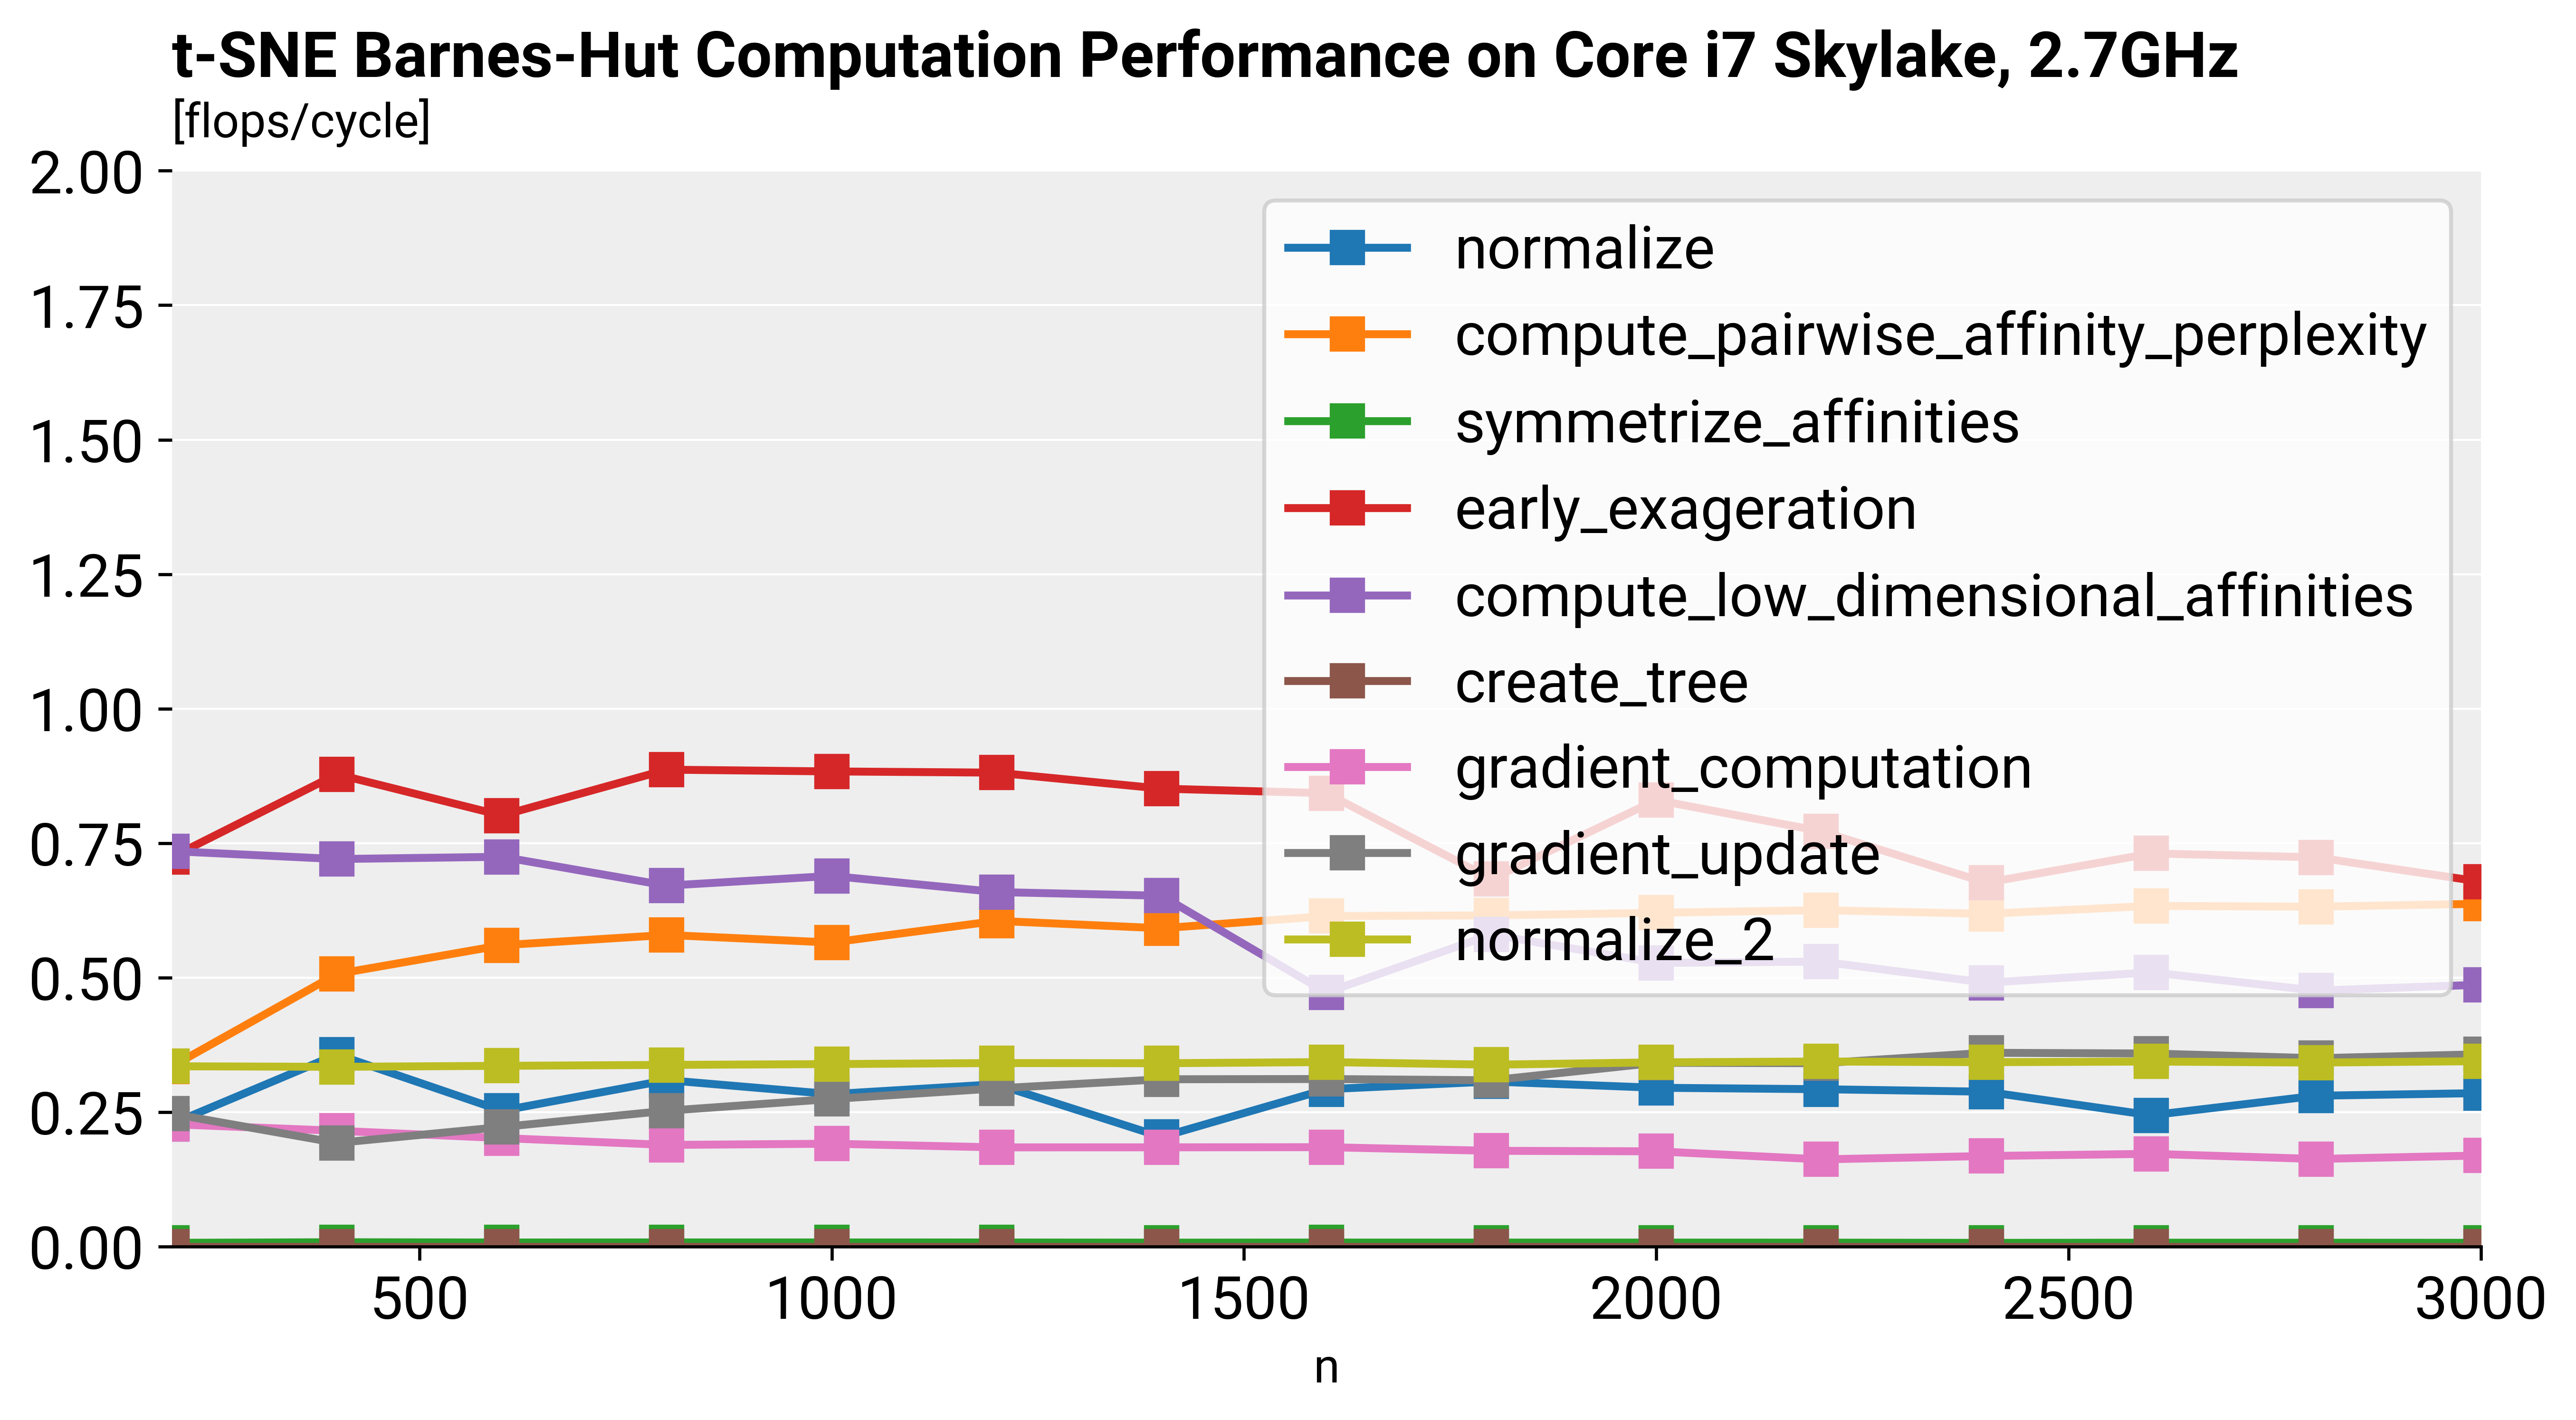

In [7]:
performance_by_function_bh = flops_by_function_bh / cycles_bh[:,:-1]

title = "t-SNE Barnes-Hut Computation Performance on Core i7 Skylake, 2.7GHz"
plot(N, performance_by_function_bh.T, labels=FUNCTION_NAMES_BH, title=title)
plt.show()

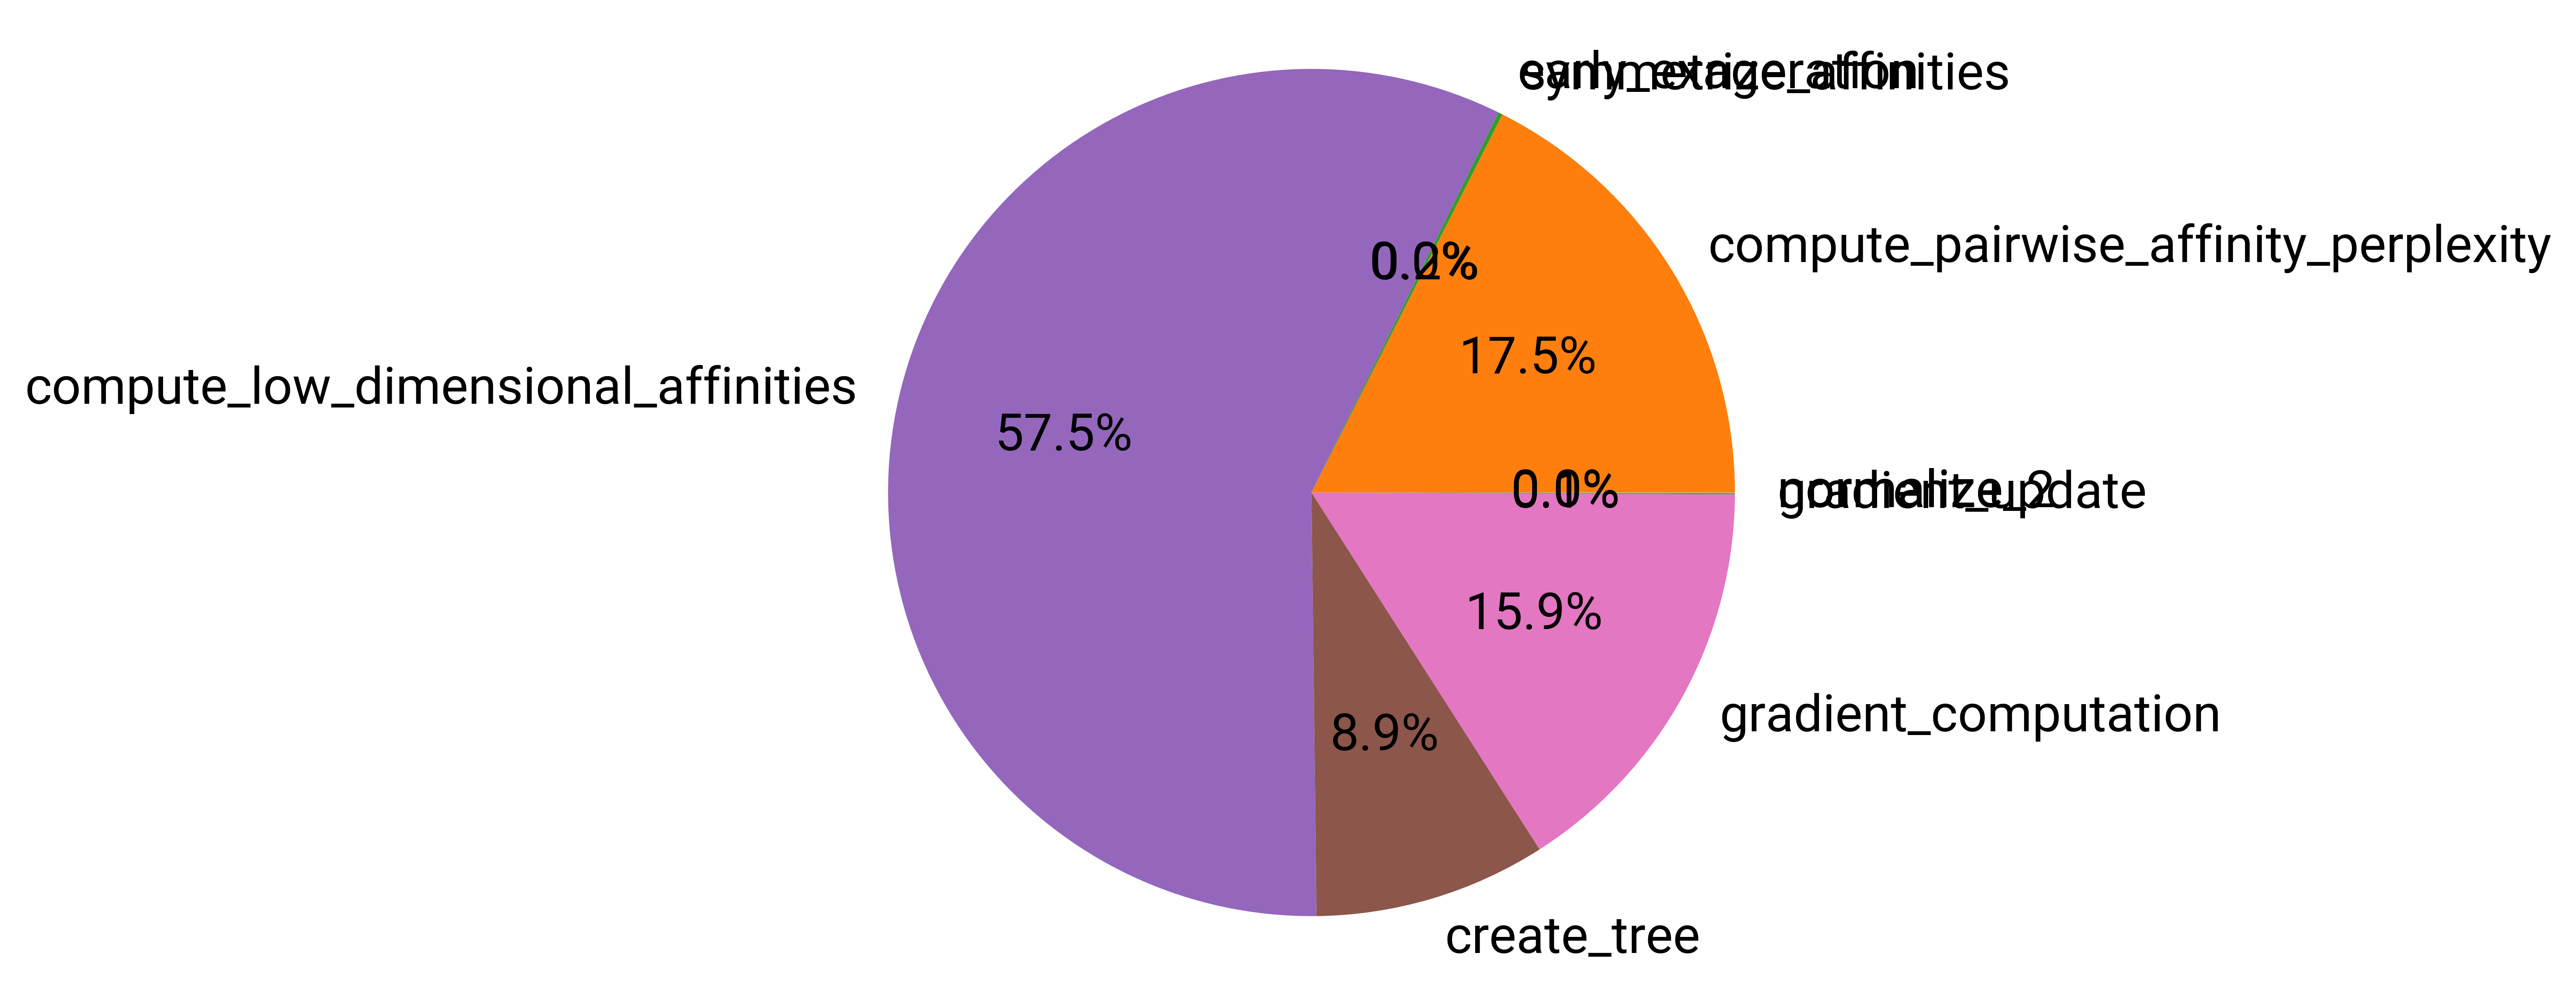

In [23]:
plt.pie(cycles_bh[-1,:-1], labels = FUNCTION_NAMES_BH, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

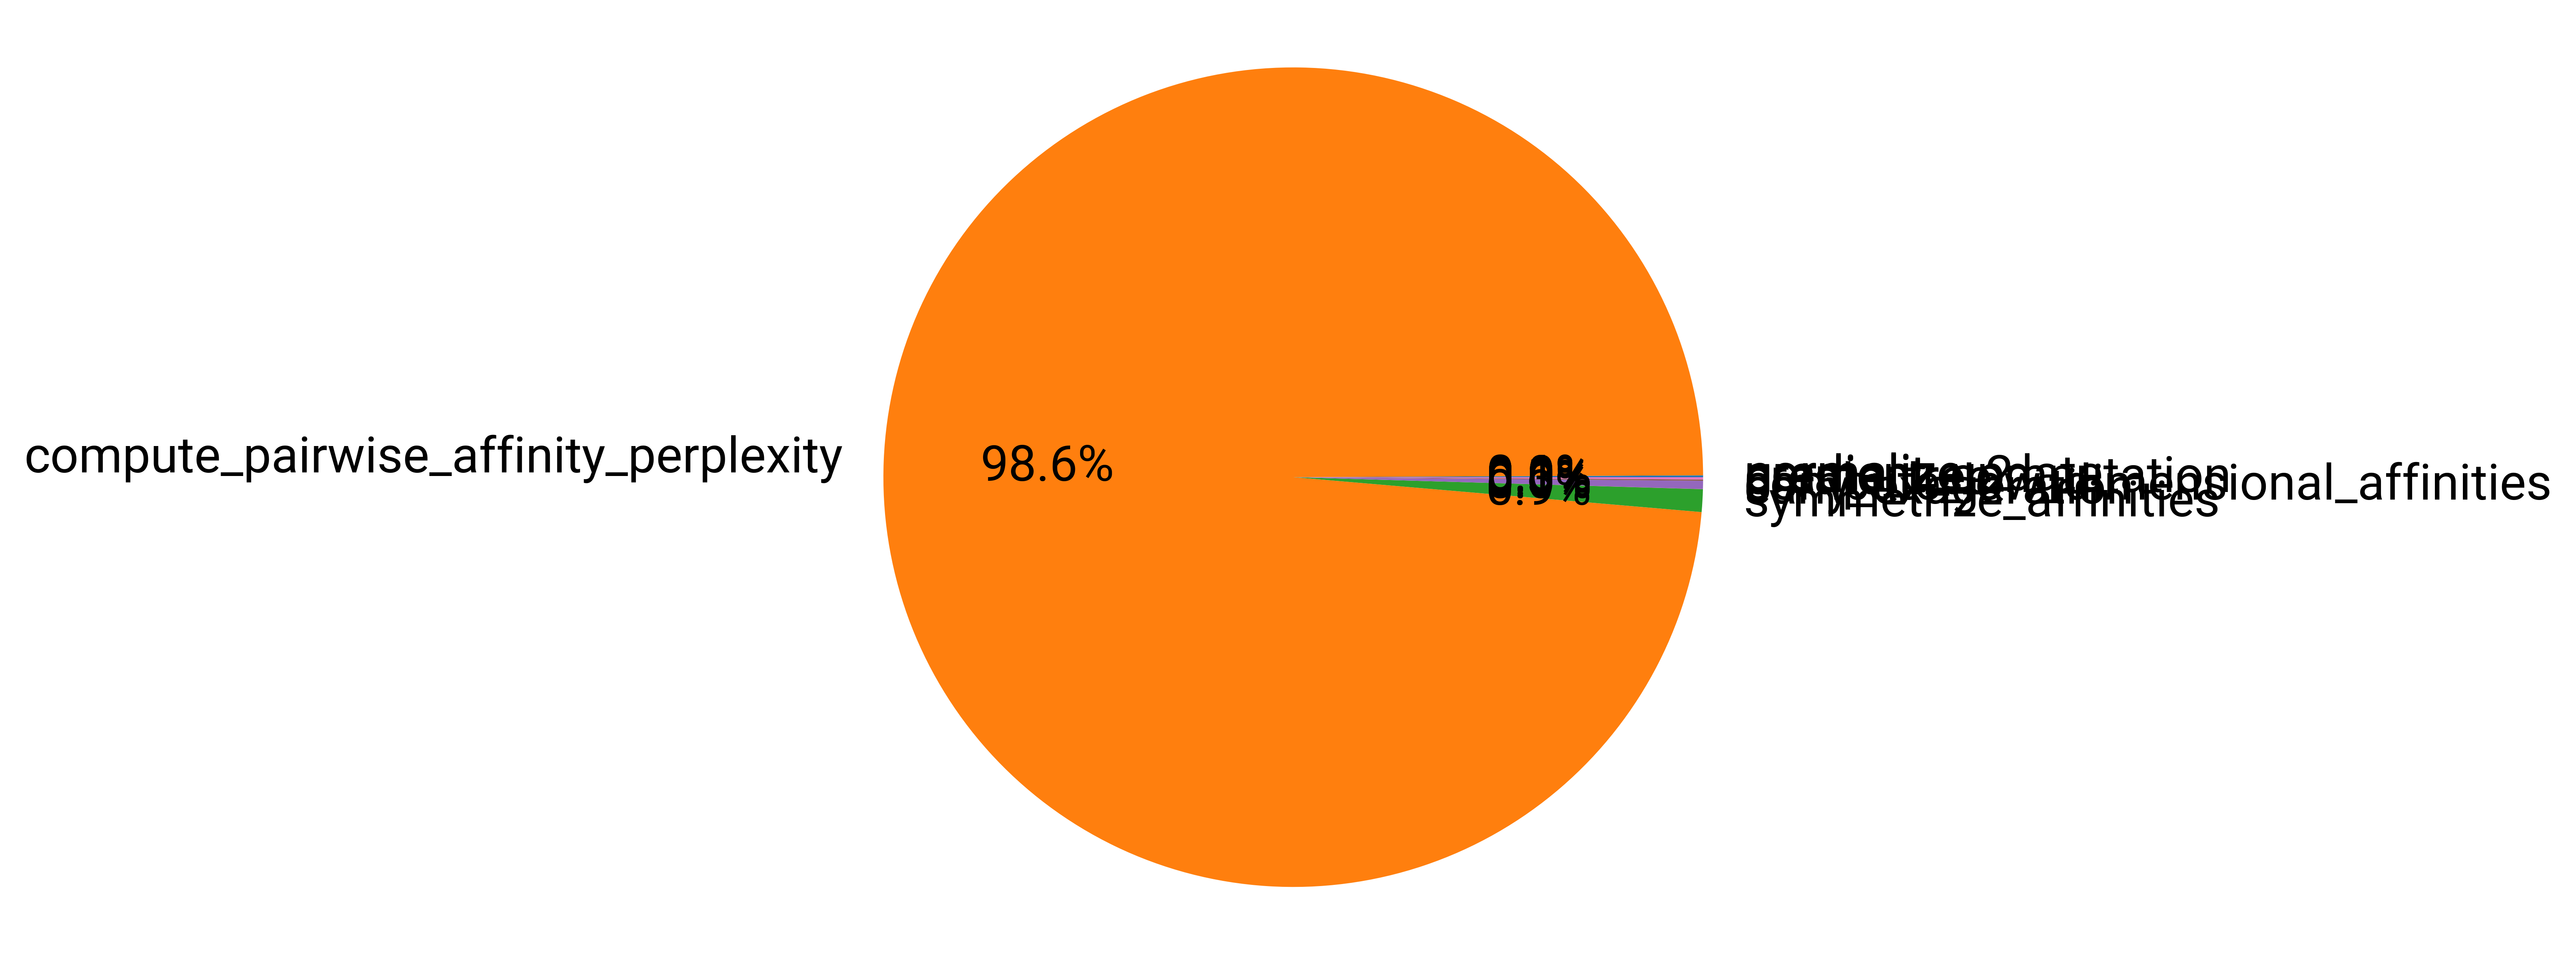

In [30]:
cycles_by_call_bh = cycles_bh[:,:-1].copy()
cycles_by_call_bh[:,4:] /= 1000

plt.pie(cycles_by_call_bh[-1], labels = FUNCTION_NAMES_BH, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Comparison Runtime

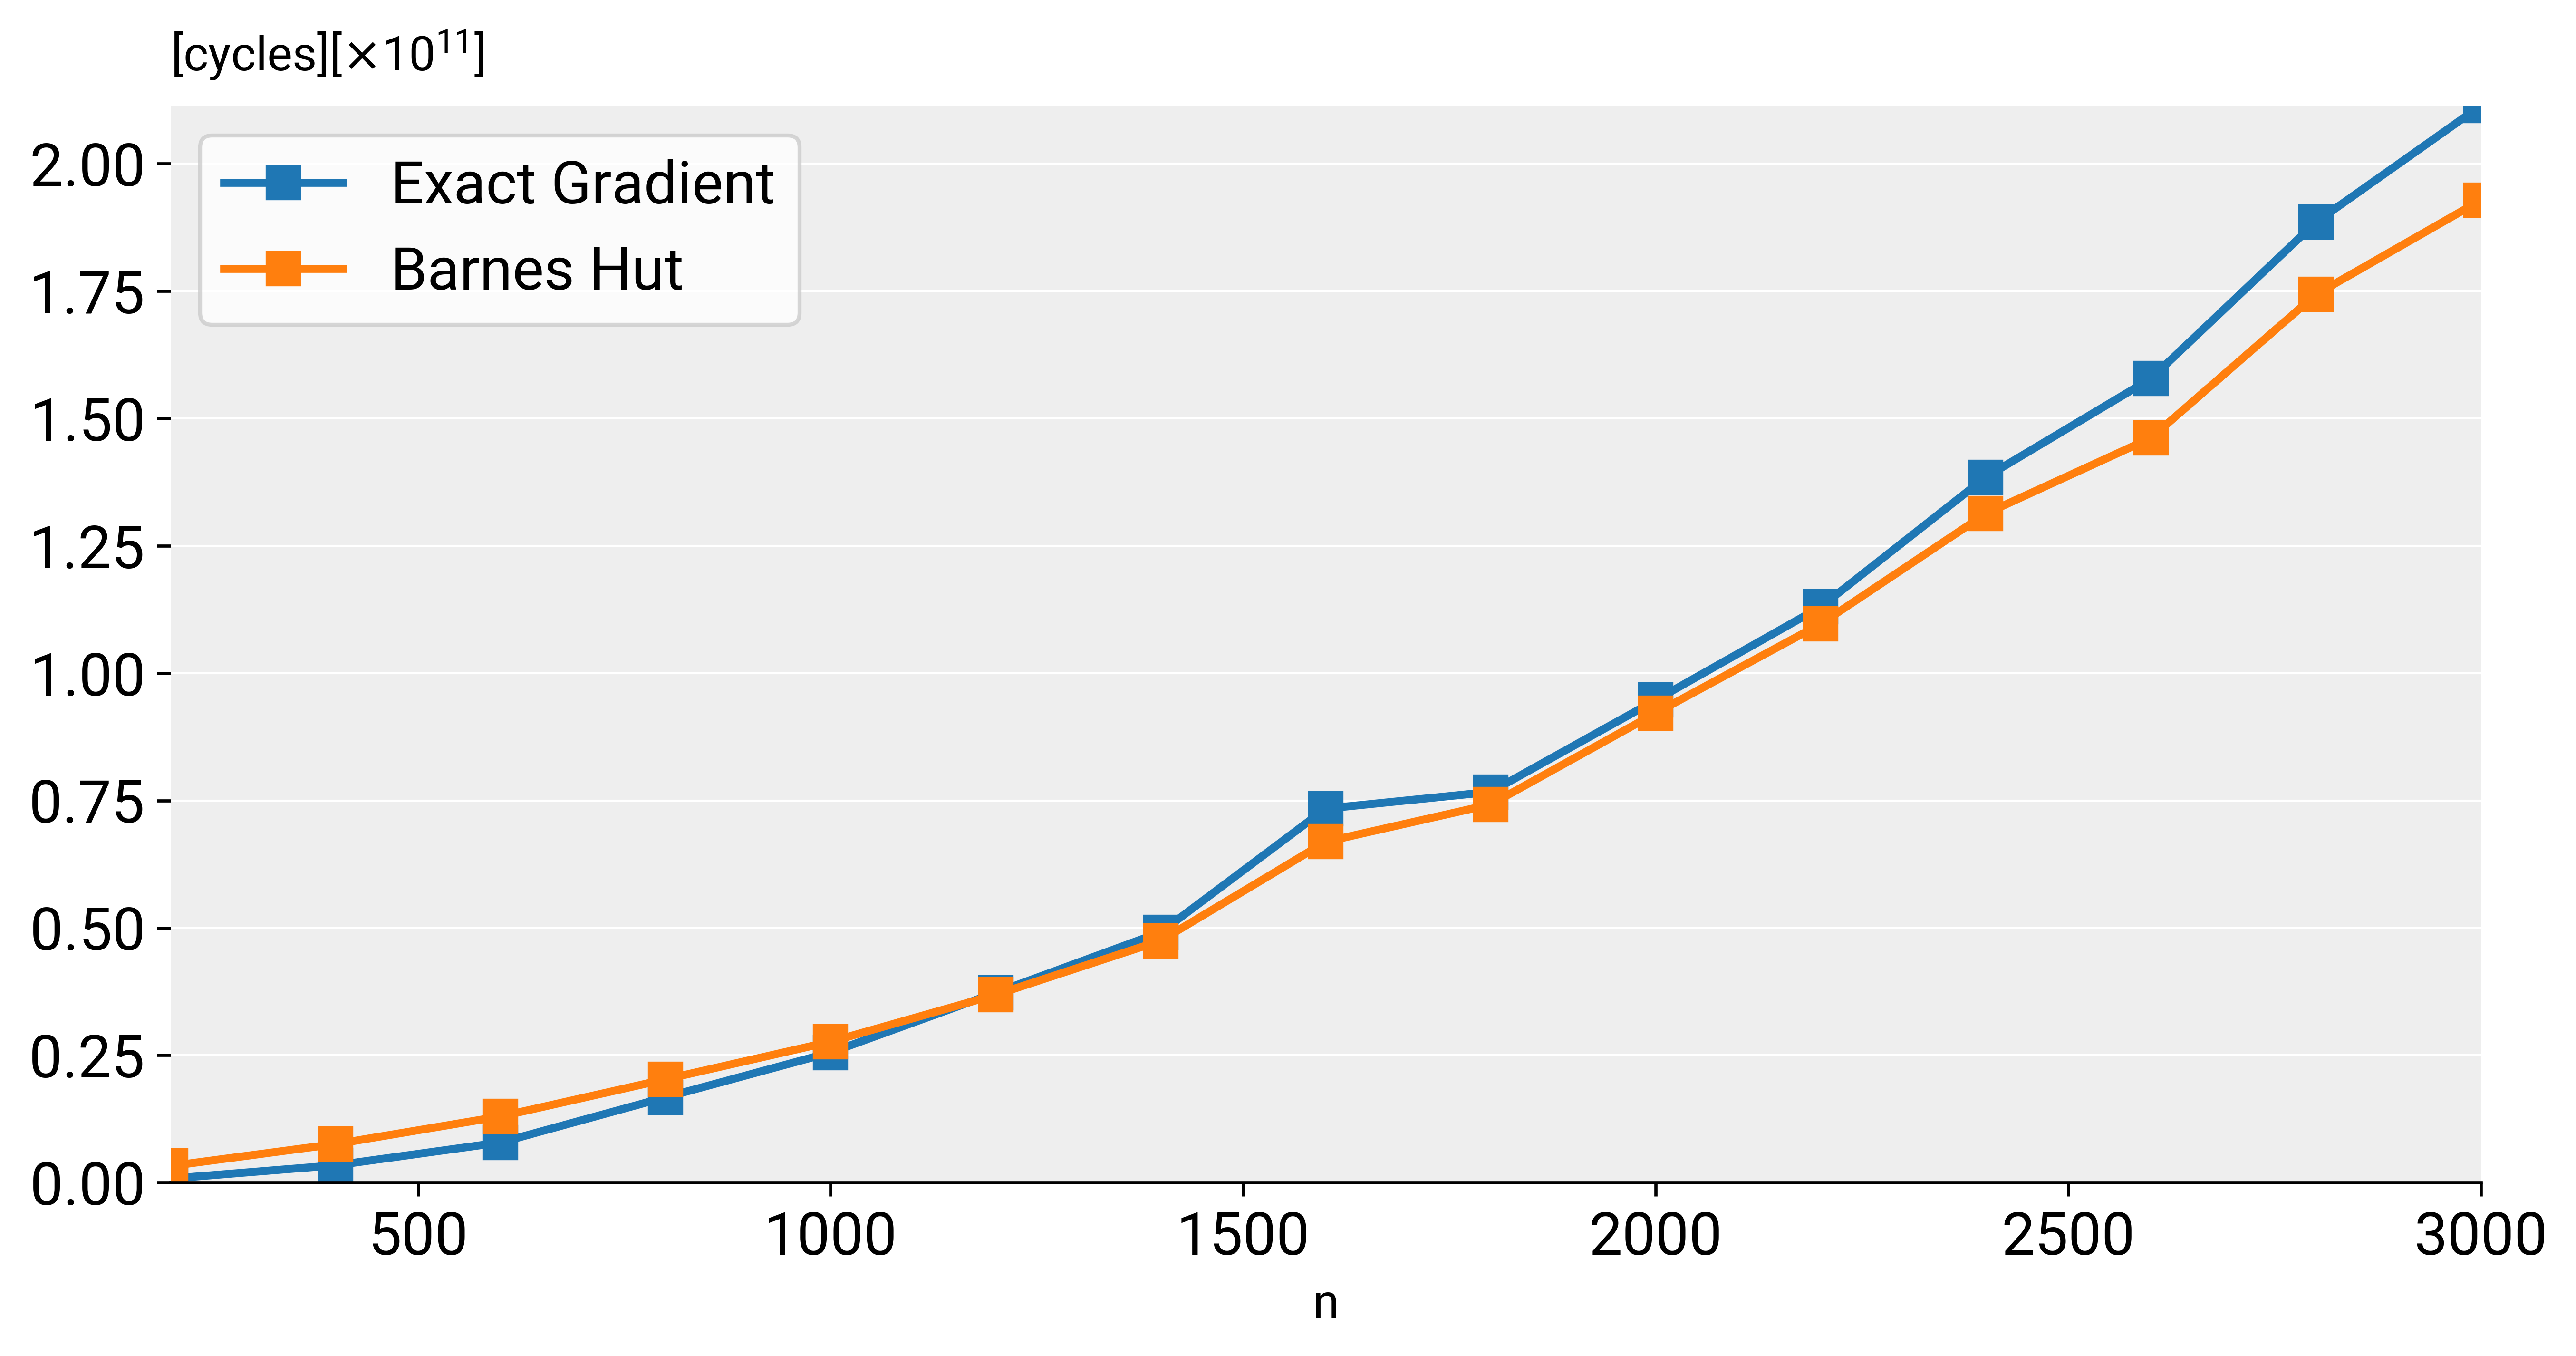

In [16]:
cycles_ex = cycles_ex[:cycles_bh.shape[0],:]
plot(N, [cycles_ex[:,-1], cycles_bh[:,-1]], labels = ["Exact Gradient", "Barnes Hut"], 
     ylim=cycles_ex[:,-1].max(), ylabel="cycles")
plt.show()

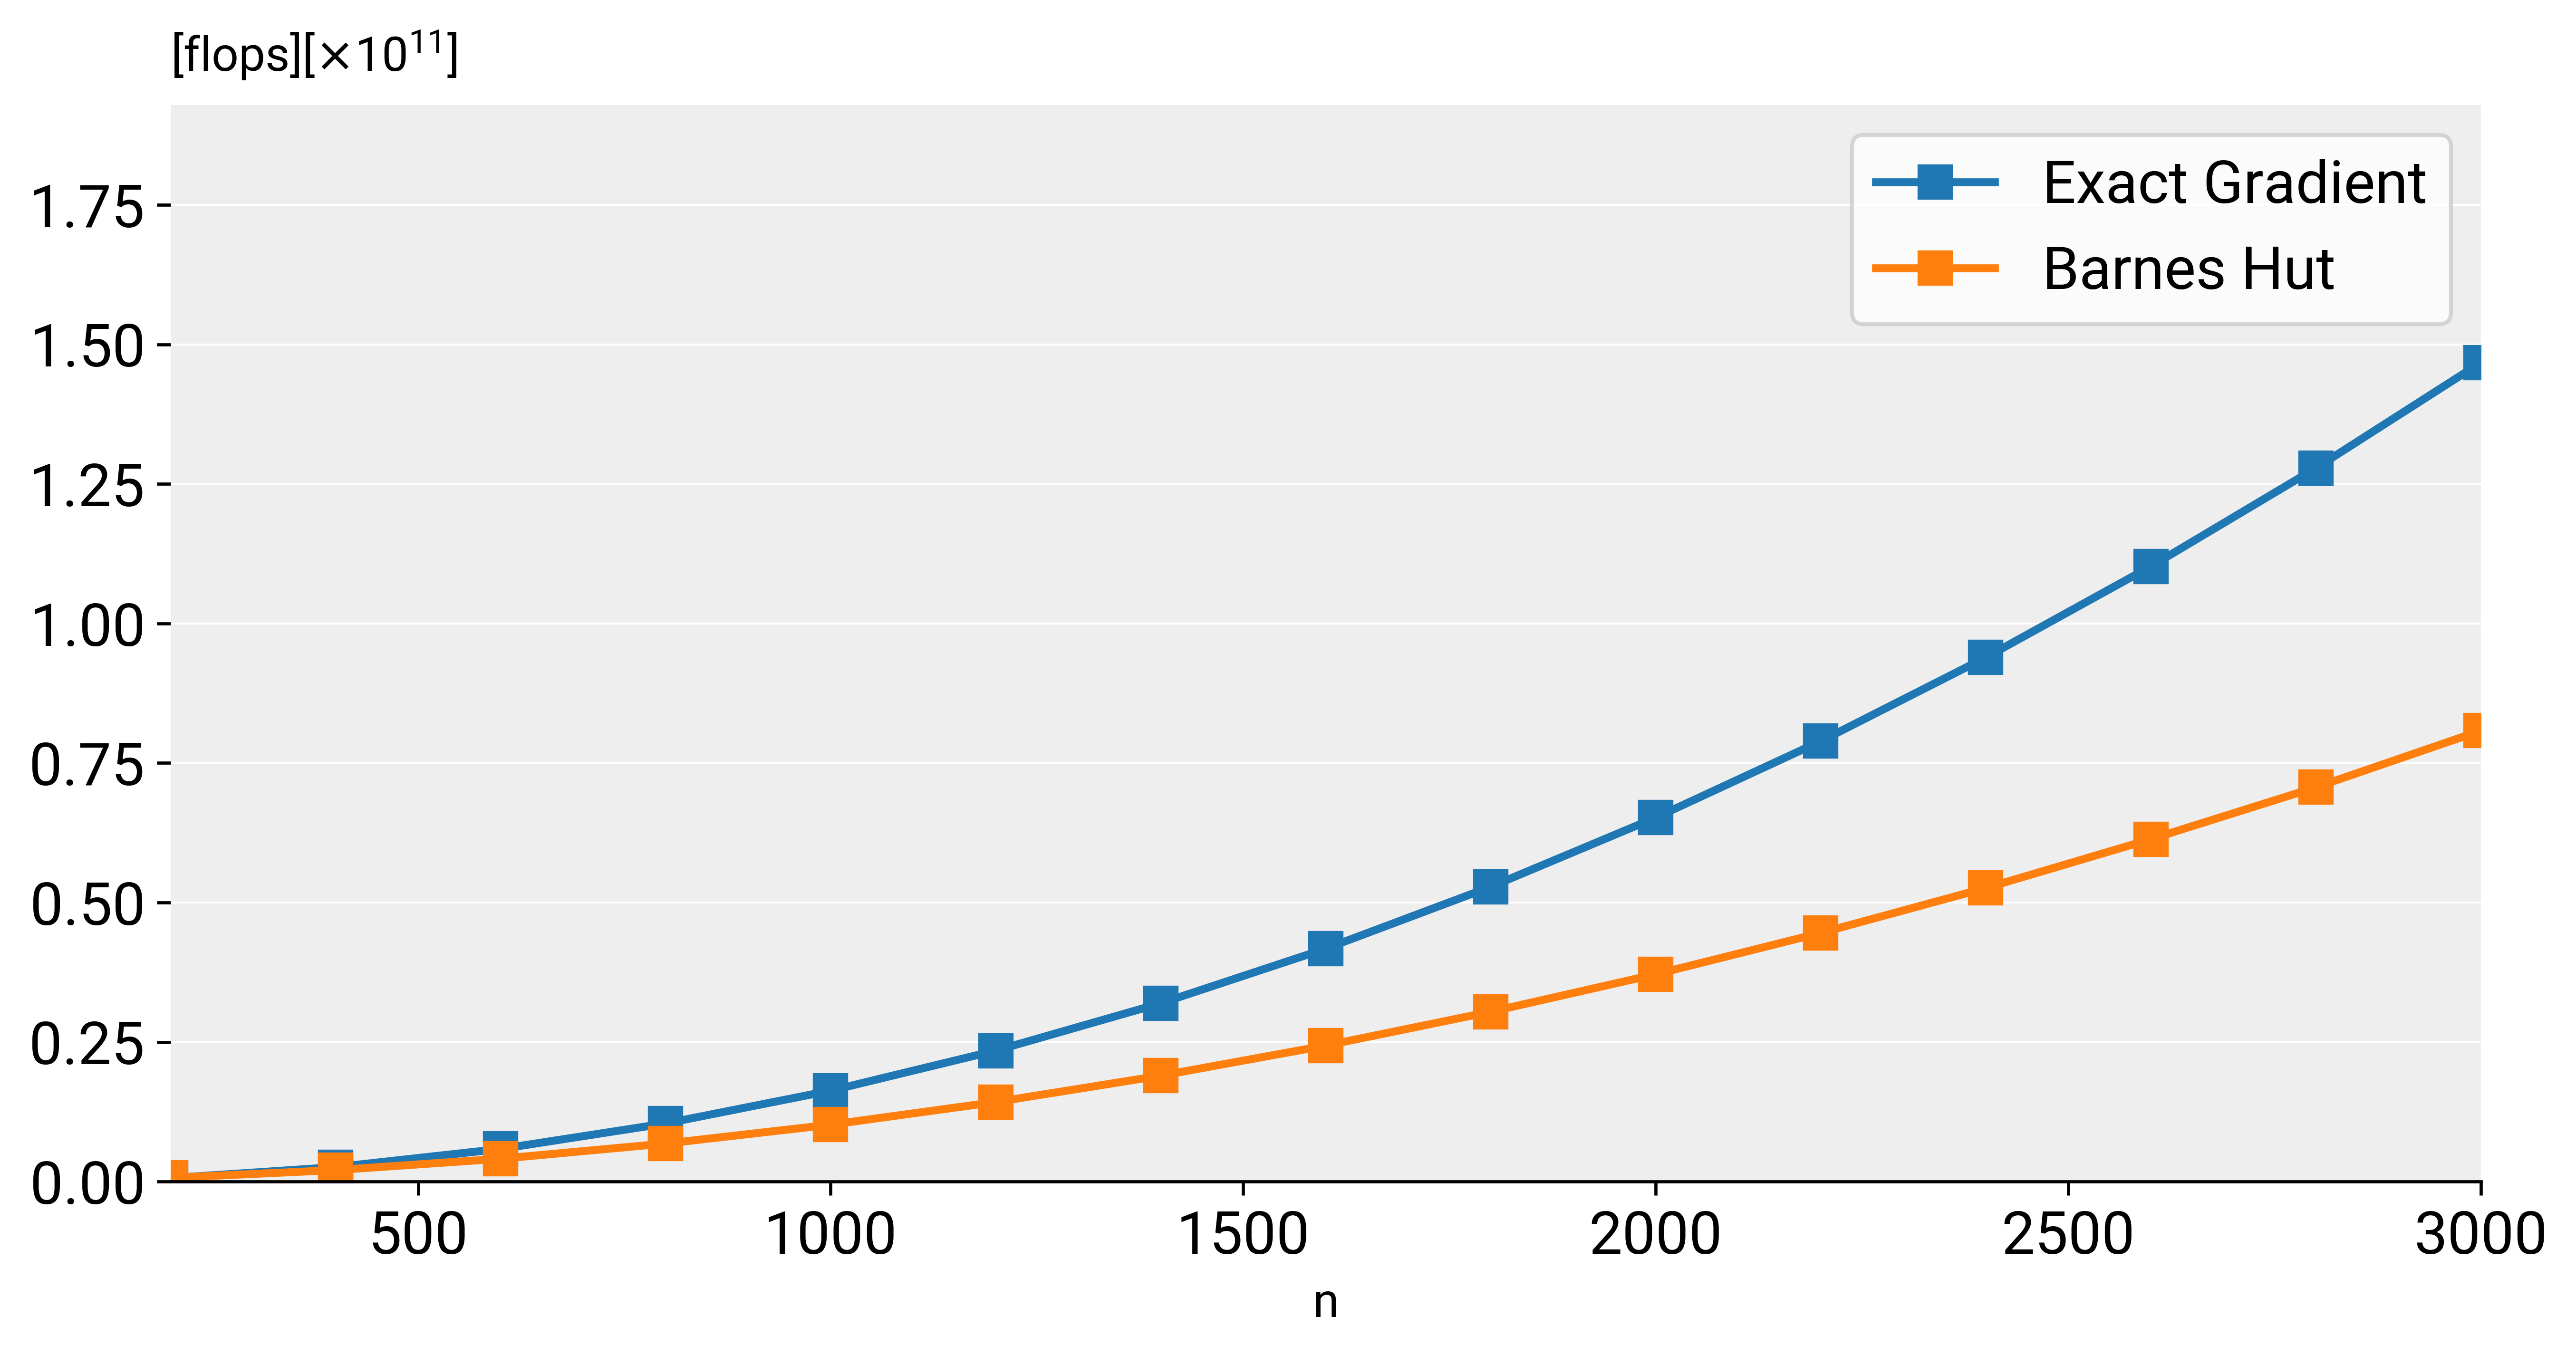

In [18]:
total_flops_ex = total_flops_ex[:N.shape[0]]
plot(N, [total_flops_ex, total_flops_bh], labels = ["Exact Gradient", "Barnes Hut"], 
     ylim=cycles_bh[:,-1].max(), ylabel="flops")
plt.show()